# NST_demo.ipynb

## Realistic Synthetic Data Generation using Neural Style Transfer (NST)
In this notebook, we demonstrate how to use NST to transfer the style of a real seismic image onto a synthetic seismic image. This approach is based on the paper:

[Add your paper reference here]

---


In [1]:
# === Imports ===
%pylab inline
import os
import numpy as np
import matplotlib.pyplot as plt

# Local imports
import nst_functions  # Contains run_nst(), prepare_tensor_for_nst()
from helper import random_crop, KLdivergence

# We assume that the Models/ folder is in the same directory and that 
# 'vgg_conv.pth' is inside Models/.

Populating the interactive namespace from numpy and matplotlib


## 1. Load and Show Data
Below, we load the real seismic image and the synthetic seismic image from `.npy` files. We also visualize them to see the initial difference.


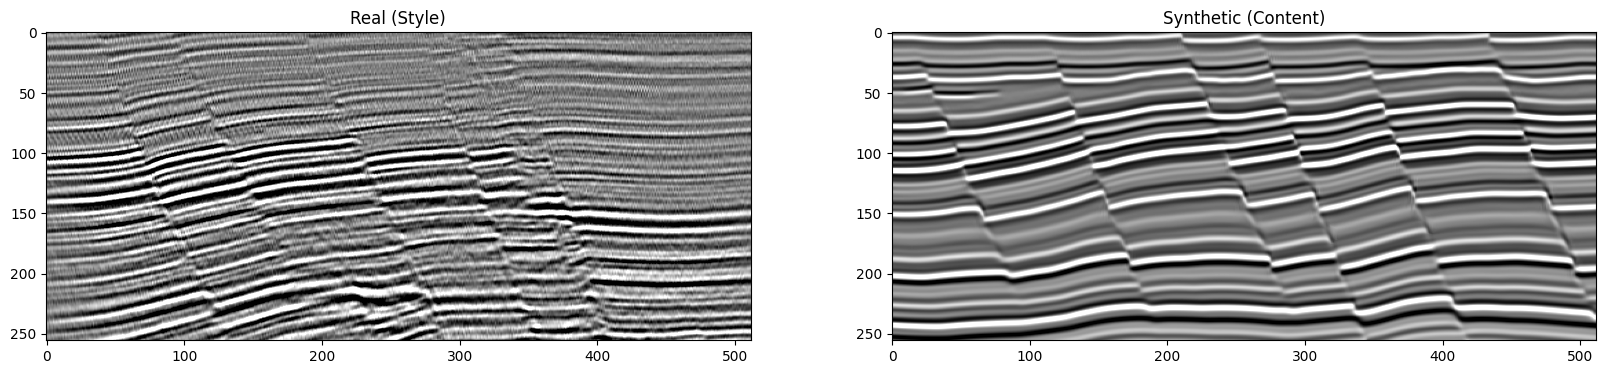

In [4]:
# Load images
ri = np.load('data/realimg.npy')  # Real seismic image
si = np.load('data/synimg1.npy')  # Synthetic seismic image

# Quick visualization
fig, axes = plt.subplots(1,2, figsize=(20,4))
clipVal_ri = np.percentile(np.abs(ri), 90.0)
axes[0].imshow(ri, aspect='auto', cmap='gray', vmin=-clipVal_ri, vmax=clipVal_ri)
axes[0].set_title('Real (Style)')

clipVal_si = np.percentile(np.abs(si), 90.0)
axes[1].imshow(si, aspect='auto', cmap='gray', vmin=-clipVal_si, vmax=clipVal_si)
axes[1].set_title('Synthetic (Content)')
plt.show()


## 2. (Optional) Compare the Distributions (Before NST)
We do a quick T-SNE + KL divergence to see how different these two images appear in a lower-dimensional manifold.


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


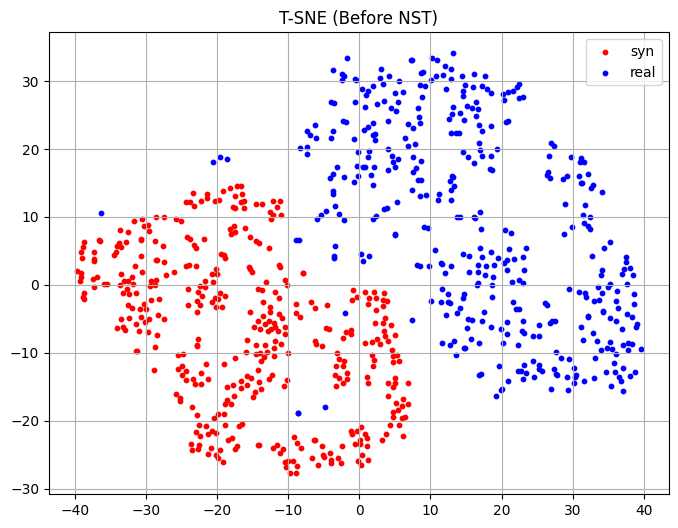

KL Divergence (before NST) = 4.905122040594081


In [5]:
# Random cropping & T-SNE
from sklearn.manifold import TSNE

n_samples = 400
crop_size = 8
syn_crops = np.zeros((n_samples, crop_size, crop_size))
real_crops = np.zeros((n_samples, crop_size, crop_size))
for i in range(n_samples):
    syn_crops[i], real_crops[i] = random_crop(si, ri, crop_size, crop_size)

# Flatten for T-SNE
syn_flat = syn_crops.reshape(n_samples, -1)
real_flat = real_crops.reshape(n_samples, -1)

# T-SNE
X = np.concatenate([syn_flat, real_flat], axis=0)
y = np.array([0]*n_samples + [1]*n_samples)
X_2d = TSNE(n_components=2, n_iter=1000).fit_transform(X)

# Plot & KL divergence
plt.figure(figsize=(8,6))
for label, color in zip([0,1], ['r','b']):
    plt.scatter(X_2d[y==label, 0], X_2d[y==label, 1], c=color, label='syn' if label==0 else 'real', s=10)
plt.legend()
plt.title('T-SNE (Before NST)')
plt.grid(True)
plt.show()

d1 = X_2d[y==0]  # synthetic
d2 = X_2d[y==1]  # real
print("KL Divergence (before NST) =", KLdivergence(d1, d2))